In [6]:
#import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import math 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## INPUT

In [2]:
#Lecture du fichier CSV en notifiant le delimiteur comme étant point-virgule
df = pd.read_csv("data/du-vert-pres-de-chez-moi.csv", sep=';')

In [3]:
# L'utilisation de la mémoire est réduite
df['Arrondissement'] = pd.to_numeric(df['Arrondissement'], downcast='signed')

In [4]:
df.head()

,Geo Point,Geo Shape,Arrondissement,Adresse,Proposition non réalisable,Type de végétalisation,Etat de la proposition,Numéro,Commentaitre accompagnant la proposition,Avancement du projet
0,"48.8656629996,2.34485000052","{""type"": ""Point"", ""coordinates"": [2.3448500005...",75002,64 Rue Montmartre,la proposition n'a pas été retenue à cause du ...,Végétalisation d'un pied d'arbre,Propositions non réalisables techniquement,S2014G2965,pas de commentaires,-
1,"48.8319033129,2.36573178953","{""type"": ""Point"", ""coordinates"": [2.3657317895...",75013,64 - 68 rue jeanne d'arc,-,Plantation d'arbre,proposition réalisable et retenue dans les 200...,S2014H2202,-,Programmé
2,"48.8353549996,2.38640999994","{""type"": ""Point"", ""coordinates"": [2.3864099999...",75012,Rue de la Nativité,la proposition n'a pas été retenue du fait des...,Mur végétalisé,Propositions non réalisables techniquement,S2014H3979,Notre Dame de Bercy - immeuble très minéral bé...,-
3,"48.8682209999,2.35201700066","{""type"": ""Point"", ""coordinates"": [2.3520170006...",75002,16 Rue de Tracy,la proposition n'a pas été retenue car le trot...,Pot ou bac à fleurs,Propositions non réalisables techniquement,S2014I437,mise en place de bacs à fleurs pour neutralise...,-
4,"48.8709650002,2.35061399974","{""type"": ""Point"", ""coordinates"": [2.3506139997...",75010,7 Impasse Bonne Nouvelle,la proposition n'a pas été retenue car elle co...,Jardinière en pleine terre,Propositions non réalisables techniquement,S2014I4542,Ouvrir Jardin . CQ St Denis Paradis,-


In [5]:
print(f"La base fait {df.shape[0]} lignes et {df.shape[1]} colonnes")

La base fait 1605 lignes et 10 colonnes


## Preprocessing

In [6]:
#Suppression des zéros dans la colonne arrondissement

df.drop(df.loc[df['Arrondissement']==0.0].index, inplace=True)

In [7]:
#Valeurs uniques

Numero = pd.DataFrame(df['Numéro'].value_counts())

Numero

,Numéro
Urnes MA,3
S2014H3805,2
S2014I3261,2
S2014G3481,2
S2014G4714,2
...,...
S2014I1343,1
S2014H59,1
S2014I1170,1
S2014H3735,1


In [8]:
PotentialDoublons = Numero[Numero['Numéro'] > 1]
PotentialDoublons

,Numéro
Urnes MA,3
S2014H3805,2
S2014I3261,2
S2014G3481,2
S2014G4714,2
S2014G1921,2


In [9]:
def samePlace(num1, num2,code):
    dx = float(df[df['Numéro'] == code]['Geo Point'].iloc[num1].split(',')[0]) - float(df[df['Numéro'] == code]['Geo Point'].iloc[num2].split(',')[0])
    dy = float(df[df['Numéro'] == code]['Geo Point'].iloc[num1].split(',')[1]) - float(df[df['Numéro'] == code]['Geo Point'].iloc[num2].split(',')[1])
    if math.sqrt(dx**2 + dy**2) < 10**-3 : return True
    return False

In [10]:
# Les lignes qui ont le même numéro et leur coordonnés sont identiques, ils sont considérés comme des doublons!
for _,code in enumerate(PotentialDoublons.index):
    num = PotentialDoublons['Numéro'].loc[code]
    while(num > 1):
        if samePlace(num - 1,num - 2,code):
            if(df[df['Numéro'] == code]['Avancement du projet'].iloc[num - 2] == '-'): 
                df.drop(df[df['Numéro'] == code].index[num - 2], inplace=True)
            else : 
                df.drop(df[df['Numéro'] == code].index[num - 2], inplace=True)
        num -= 1

In [11]:
df.sort_values(by = 'Arrondissement', inplace = True)

In [12]:
df.drop(['Geo Shape', 'Adresse', 'Numéro'],axis = 1, inplace=True)

In [13]:
df.head()

,Geo Point,Arrondissement,Proposition non réalisable,Type de végétalisation,Etat de la proposition,Commentaitre accompagnant la proposition,Avancement du projet
818,"48.8584838913,2.34517549249",75001,-,Pot ou bac à fleurs,proposition réalisable et retenue dans les 200...,-,Réalisé
688,"48.8657610846,2.33440528959",75001,-,Pot ou bac à fleurs,proposition réalisable et retenue dans les 200...,-,Programmé
693,"48.8608896292,2.34514525511",75001,-,Mur végétalisé,proposition réalisable et retenue dans les 200...,-,En cours de substitution / En cours de validation
1200,"48.860092,2.34057199968",75001,la proposition n'a pas été retenue car elle co...,Jardinière en pleine terre,Propositions non réalisables techniquement,Planter du gazon et des fleurs devant cette pa...,-
729,"48.8636750002,2.34870099969",75001,-,plantation d?arbre,proposition réalisable techniquement mais non ...,-,-


## Pandas profiling

In [14]:
profile = ProfileReport(df, title="Du Vert près de Chez moi")
profile

En analysant la corrélation V de Cramer, on peut déduire une forte corrélation entre les colonnes:

   `[Proposition non réalisable]`  & `[Etat de la proposition]` : 0.7-0.8

   `[Avancement du projet]` & `[Etat de la proposition]` : 0.7-0.8
 

In [15]:
df['Etat de la proposition'].value_counts().to_frame()

,Etat de la proposition
Propositions non réalisables techniquement,1091
proposition réalisable techniquement mais non retenue dans les 200 points de végétalisation,299
proposition réalisable et retenue dans les 200 points de végétalisation,209


# **<span style="color:#37a871">Groupage des stats dans la même colonne ['Avancement du projet']</span>**

Le groupage nous permettera de mieux visualiser le status des propositions, si elles ont été retenues ou pas, et le cas échéant l'état d'avancement.

In [16]:
df.loc[df['Proposition non réalisable'] != '-', ['Avancement du projet']] = "non retenu"

### Propositions non réalisables techniquement

In [17]:
#le dataframe dfnrt contiendra toutes les Propositions non réalisables techniquement
dfnrt= df[df['Etat de la proposition'] == 'Propositions non réalisables techniquement']

In [18]:
dfnrt

,Geo Point,Arrondissement,Proposition non réalisable,Type de végétalisation,Etat de la proposition,Commentaitre accompagnant la proposition,Avancement du projet
1200,"48.860092,2.34057199968",75001,la proposition n'a pas été retenue car elle co...,Jardinière en pleine terre,Propositions non réalisables techniquement,Planter du gazon et des fleurs devant cette pa...,non retenu
1500,"48.86244,2.34144299976",75001,la proposition n'a pas été retenue car elle co...,Mur végétalisé,Propositions non réalisables techniquement,"mur borgne (rue du louvre), avec belle perspec...",non retenu
76,"48.8597440002,2.34690800004",75001,la proposition n'a pas été retenue car peu com...,Mur végétalisé,Propositions non réalisables techniquement,pas de commentaires,non retenu
763,"48.8636379998,2.34853900066",75001,la proposition n'a pas été retenue car peu com...,Autre proposition,Propositions non réalisables techniquement,Végétaliser le tronçon de la rue de Turbigo en...,non retenu
1160,"48.8594270002,2.34386199938",75001,"l'absence de commentaires ou de photos, ou de ...",Autre proposition,Propositions non réalisables techniquement,pas de commentaires,non retenu
...,...,...,...,...,...,...,...
937,"48.8662320001,2.40620699964",75020,"l'absence de commentaires ou de photos, ou de ...",Autre proposition,Propositions non réalisables techniquement,pas de commentaires,non retenu
938,"48.8721950004,2.39790099935",75020,la proposition n'a pas été retenue car elle co...,Mur végétalisé,Propositions non réalisables techniquement,Cette immeuble présente un mur aveugle potenti...,non retenu
144,"48.8746829997,2.39064800044",75020,la proposition n'a pas été retenue car elle co...,Autre proposition,Propositions non réalisables techniquement,"toit pouvant être végétalise, 51 rue du Borrego",non retenu
677,"48.8715660003,2.40211999999",75020,la proposition n'a pas été retenue car elle co...,Mur végétalisé,Propositions non réalisables techniquement,Cet immeuble très haut possède une façade vide...,non retenu


In [19]:
print(f"La base fait {dfnrt.shape[0]} lignes et {dfnrt.shape[1]} colonnes")

La base fait 1091 lignes et 7 colonnes


#### Relation & statistiques entre les modalités de la colonne ['Etat de la proposition'] & ['Avancement du projet'] <span style="color:red"> avant processing </span>

In [20]:
df.loc[:,['Etat de la proposition','Avancement du projet']].value_counts().to_frame()

0
Etat de la proposition                             Avancement du projet                                   
Propositions non réalisables techniquement         non retenu                                         1091
proposition réalisable techniquement mais non r... -                                                   299
proposition réalisable et retenue dans les 200 ... Réalisé                                              86
                                                   Programmé                                            43
                                                   En cours d'études                                    43
                                                   En cours de substitution / En cours de validation    37

In [21]:
#le dataframe dfr contiendra toutes les Propositions réalisables mais pas forcément retenues
dfr = df.drop(dfnrt.index)
dfr

,Geo Point,Arrondissement,Proposition non réalisable,Type de végétalisation,Etat de la proposition,Commentaitre accompagnant la proposition,Avancement du projet
818,"48.8584838913,2.34517549249",75001,-,Pot ou bac à fleurs,proposition réalisable et retenue dans les 200...,-,Réalisé
688,"48.8657610846,2.33440528959",75001,-,Pot ou bac à fleurs,proposition réalisable et retenue dans les 200...,-,Programmé
693,"48.8608896292,2.34514525511",75001,-,Mur végétalisé,proposition réalisable et retenue dans les 200...,-,En cours de substitution / En cours de validation
729,"48.8636750002,2.34870099969",75001,-,plantation d?arbre,proposition réalisable techniquement mais non ...,-,-
1468,"48.8597663086,2.34820143263",75001,-,Pot ou bac à fleurs,proposition réalisable et retenue dans les 200...,-,Réalisé
...,...,...,...,...,...,...,...
889,"48.8550490002,2.39854999997",75020,-,Végétalisation d'un pied d'arbre,proposition réalisable techniquement mais non ...,-,-
218,"48.864019,2.40017399937",75020,-,autre proposition,proposition réalisable techniquement mais non ...,-,-
217,"48.8640969997,2.4017509994",75020,-,Pot ou bac à fleurs,proposition réalisable techniquement mais non ...,-,-
1365,"48.8543909998,2.39648499979",75020,-,Végétalisation d'un pied d'arbre,proposition réalisable techniquement mais non ...,-,-


In [22]:
print(f"La base fait {dfr.shape[0]} lignes et {dfr.shape[1]} colonnes")

La base fait 508 lignes et 7 colonnes


#### Les modalités de la colonne ['Etat de la proposition'] correspondant à "-" dans la colonne ['Proposition non réalisable] :

In [23]:
pd.DataFrame(dfr[dfr['Proposition non réalisable'] == '-']["Etat de la proposition"].value_counts())

,Etat de la proposition
proposition réalisable techniquement mais non retenue dans les 200 points de végétalisation,299
proposition réalisable et retenue dans les 200 points de végétalisation,209


#### Groupage des propositions non réalisables/non retenues dans le groupe "non retenu" de la colonne ['Avancement du projet']

In [24]:
df.loc[df["Etat de la proposition"].str.contains("Propositions non réalisables techniquement|non retenue dans les 200"),['Avancement du projet']] = 'non retenu'

#### Groupage des modalités "Réalisé" et "Programmé" sous le groupe "retenu" dans la colonne ['Avancement du projet']

In [25]:
#Groupage des propositions réalisées/programmées en un grand groupe : "retenu"
df.loc[df["Avancement du projet"].str.contains("Réalisé"),['Avancement du projet']] = 'retenu'

In [26]:
df.loc[df["Avancement du projet"].str.contains("Programmé"),['Avancement du projet']] = 'retenu'

In [27]:
retenu = df[df['Avancement du projet'].eq('retenu')]

#### Groupage des modalités "en cours d'études/De substitution/De validation" sous le groupe "en cours de validation" dans la colonne ['Avancement du projet']

In [28]:
#Groupage des propositions En cours d'études/De substitution/De validation en un grand groupe : "en cours de validation"
df.loc[df["Avancement du projet"].str.contains("En cours d'études"),['Avancement du projet']] = 'en cours de validation'

In [29]:
df.loc[df["Avancement du projet"].str.contains("En cours de substitution / En cours de validation"),['Avancement du projet']] = 'en cours de validation'

In [30]:
encours = df[df['Avancement du projet'].eq('en cours de validation')]

In [31]:
df['Avancement du projet'].value_counts().to_frame()

,Avancement du projet
non retenu,1390
retenu,129
en cours de validation,80


#### 3 groupes distincts à partir desquels on peut dresser les stats par Arrondissements

#### Relation & statistiques entre les modalités de la colonne ['Etat de la proposition'] & ['Avancement du projet'] <span style="color:red"> après processing </span>

In [32]:
df.loc[:,['Etat de la proposition','Avancement du projet']].value_counts().to_frame()

0
Etat de la proposition                             Avancement du projet        
Propositions non réalisables techniquement         non retenu              1091
proposition réalisable techniquement mais non r... non retenu               299
proposition réalisable et retenue dans les 200 ... retenu                   129
                                                   en cours de validation    80

# **<span style="color:#37a871">Stats par Arrondissement de toutes les propositions</span>**

In [33]:
#Indexation par Arrondissement
df=df.set_index('Arrondissement')

In [34]:
#Stats pourcentages par Arrondissements
df['Avancement du projet'].groupby(df.index).value_counts(normalize=True).mul(100).round(decimals=0).to_frame()

Avancement du projet
Arrondissement Avancement du projet                        
75001          non retenu                              82.0
               en cours de validation                  10.0
               retenu                                   8.0
75002          non retenu                              86.0
               retenu                                  10.0
               en cours de validation                   4.0
75003          non retenu                              90.0
               retenu                                   6.0
               en cours de validation                   4.0
75004          non retenu                              75.0
               retenu                                  19.0
               en cours de validation                   6.0
75005          non retenu                              75.0
               retenu                                  17.0
               en cours de validation                   8.0
75006          non retenu                              92.0
               retenu                                   8.0
75007          non retenu                              87.0
               en cours de validation                   7.0
               retenu                                   7.0
75008          non retenu                              94.0
               retenu                                   6.0
75009          non retenu                              78.0
               en cours de validation                  12.0
               retenu                                  10.0
75010          non retenu                              91.0
               en cours de validation                   4.0
               retenu                                   4.0
75011          non retenu                              90.0
               retenu                                   7.0
               en cours de validation                   3.0
75012          non retenu                              88.0
               retenu                                   9.0
               en cours de validation                   3.0
75013          non retenu                              92.0
               en cours de validation                   5.0
               retenu                                   4.0
75014          non retenu                              81.0
               retenu                                  15.0
               en cours de validation                   4.0
75015          non retenu                              74.0
               retenu                                  17.0
               en cours de validation                   9.0
75016          non retenu                              84.0
               retenu                                  12.0
               en cours de validation                   4.0
75017          non retenu                              82.0
               retenu                                  10.0
               en cours de validation                   8.0
75018          non retenu                              93.0
               en cours de validation                   4.0
               retenu                                   3.0
75019          non retenu                              84.0
               en cours de validation                   8.0
               retenu                                   8.0
75020          non retenu                              88.0
               retenu                                   8.0
               en cours de validation                   4.0

In [35]:
arr= list(range(75001,75021))
lis = []
for i in arr: 
    lis.append(pd.DataFrame(df[df.index == i]['Avancement du projet'].value_counts()).loc['retenu'][0])
dd = pd.concat([pd.DataFrame(df.index.value_counts()),pd.concat([pd.DataFrame([df.loc[df.index ==i,['Avancement du projet']].value_counts().values[0]], index=[i], columns=['non retenue']) for i in range(75001,75021)])],axis=1)
dd = pd.concat([dd,pd.DataFrame(lis,index=arr, columns=['retenue'])],axis=1)
dd['En cours'] = dd['Arrondissement'] - dd['non retenue'] - dd['retenue']
dd = dd.reset_index()
dd.columns = ['Arrondissement','Propositions','non retenue','retenue','en cours']
dd['retenue + non retenue'] = dd['non retenue'] + dd['retenue']
dd

,Arrondissement,Propositions,non retenue,retenue,en cours,retenue + non retenue
0,75001,39,32,3,4,35
1,75002,69,59,7,3,66
2,75003,50,45,3,2,48
3,75004,16,12,3,1,15
4,75005,24,18,4,2,22
5,75006,12,11,1,0,12
6,75007,15,13,1,1,14
7,75008,31,29,2,0,31
8,75009,50,39,5,6,44
9,75010,163,149,7,7,156


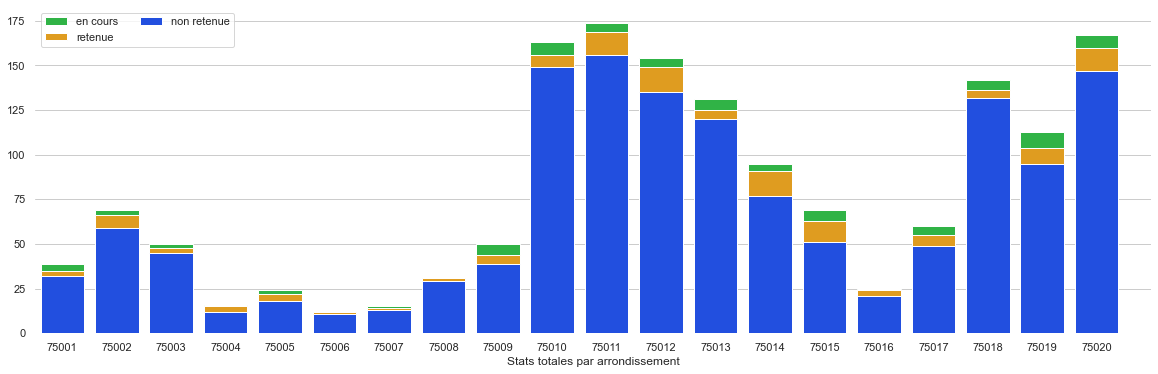

In [36]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 6))

sns.set_color_codes("bright")
sns.barplot(x="Arrondissement", y="Propositions", data=dd,
            label="en cours", color="g")


sns.set_color_codes("bright")
sns.barplot(x="Arrondissement", y="retenue + non retenue", data=dd,
            label="retenue", color="orange")


sns.set_color_codes("bright")
sns.barplot(x="Arrondissement", y="non retenue", data=dd,
            label="non retenue", color='b')


ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlim=(-0.5, 20), ylabel="",
       xlabel="Stats totales par arrondissement")
sns.despine(left=True, bottom=True)

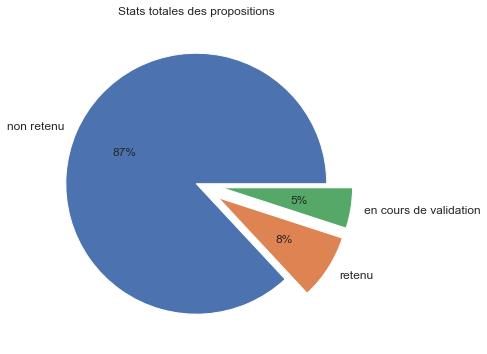

In [37]:
#Pie chart de toutes les propositions présentes dans la base de données
df['Avancement du projet'].value_counts().plot(kind='pie',ylabel='', title= 'Stats totales des propositions', autopct='%1.f%%', legend = False, figsize=(12,6), fontsize=12,explode = [0, 0.2, 0.2]);

## **<span style="color:#37a871">Stats des propositions retenues par Arrondissement</span>**

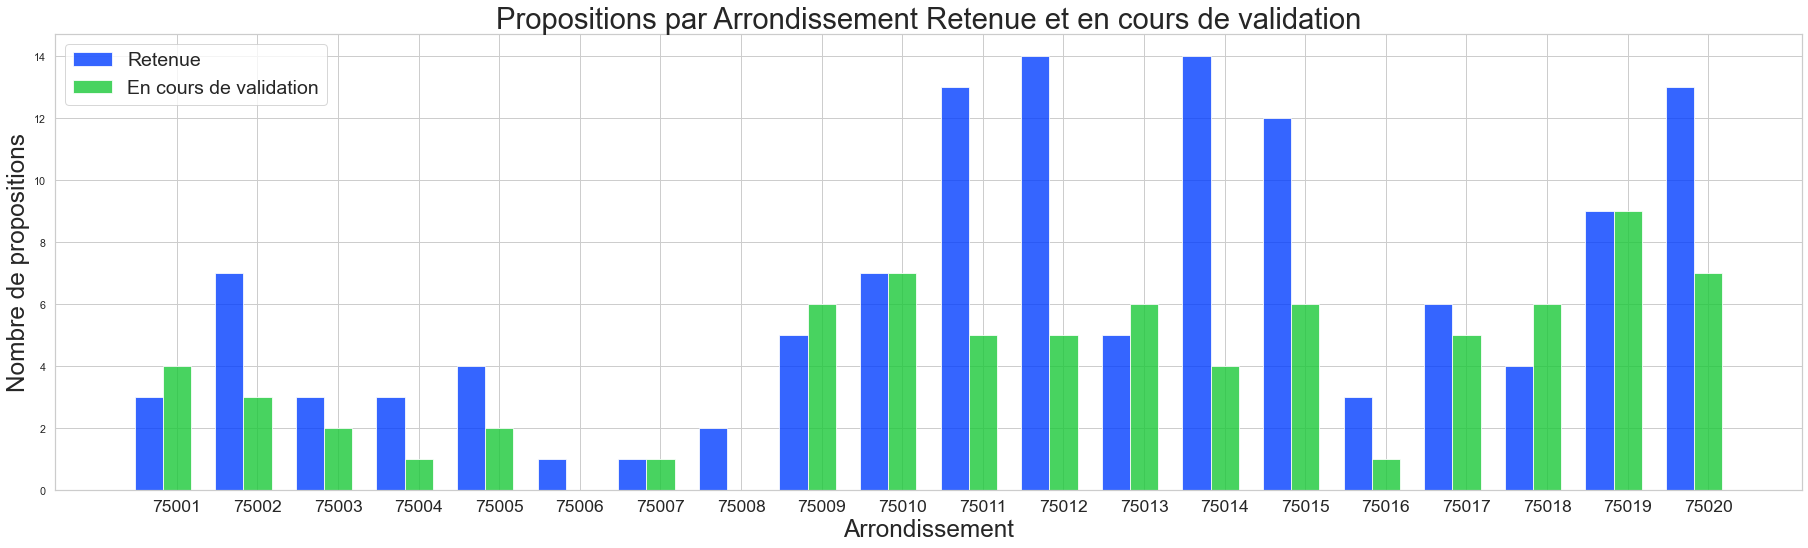

In [38]:
# data to plot
n_groups = 20
retenue = dd['retenue']
encours = dd['en cours']

# create plot
fig, ax = plt.subplots(figsize=(26,8), dpi=70)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, retenue, bar_width,
alpha=opacity,
color='b',
label='Retenue')

rects2 = plt.bar(index + bar_width, encours, bar_width,
alpha=opacity,
color='g',
label='En cours de validation')

plt.xlabel('Arrondissement', fontsize= 25)
plt.ylabel('Nombre de propositions', fontsize=25)
plt.title('Propositions par Arrondissement Retenue et en cours de validation', fontsize= 30)
plt.xticks(index + bar_width, list(range(75001,75021)),fontsize= 18)
plt.legend(fontsize=20)

plt.tight_layout()
plt.show();

### Types de végétalisation

In [39]:
warnings.filterwarnings("ignore", 'This pattern has match groups' )

In [40]:
#Toutes les propositions non retenues
nonretenu= df[df['Avancement du projet'] == 'non retenu'].copy(deep=True)
nonretenu

,Geo Point,Proposition non réalisable,Type de végétalisation,Etat de la proposition,Commentaitre accompagnant la proposition,Avancement du projet
Arrondissement,,,,,,
75001,"48.860092,2.34057199968",la proposition n'a pas été retenue car elle co...,Jardinière en pleine terre,Propositions non réalisables techniquement,Planter du gazon et des fleurs devant cette pa...,non retenu
75001,"48.8636750002,2.34870099969",-,plantation d?arbre,proposition réalisable techniquement mais non ...,-,non retenu
75001,"48.86244,2.34144299976",la proposition n'a pas été retenue car elle co...,Mur végétalisé,Propositions non réalisables techniquement,"mur borgne (rue du louvre), avec belle perspec...",non retenu
75001,"48.8597440002,2.34690800004",la proposition n'a pas été retenue car peu com...,Mur végétalisé,Propositions non réalisables techniquement,pas de commentaires,non retenu
75001,"48.8636379998,2.34853900066",la proposition n'a pas été retenue car peu com...,Autre proposition,Propositions non réalisables techniquement,Végétaliser le tronçon de la rue de Turbigo en...,non retenu
...,...,...,...,...,...,...
75020,"48.8662320001,2.40620699964","l'absence de commentaires ou de photos, ou de ...",Autre proposition,Propositions non réalisables techniquement,pas de commentaires,non retenu
75020,"48.8721950004,2.39790099935",la proposition n'a pas été retenue car elle co...,Mur végétalisé,Propositions non réalisables techniquement,Cette immeuble présente un mur aveugle potenti...,non retenu
75020,"48.8746829997,2.39064800044",la proposition n'a pas été retenue car elle co...,Autre proposition,Propositions non réalisables techniquement,"toit pouvant être végétalise, 51 rue du Borrego",non retenu


In [41]:
retenu=retenu.copy(deep=True)

retenu

,Geo Point,Arrondissement,Proposition non réalisable,Type de végétalisation,Etat de la proposition,Commentaitre accompagnant la proposition,Avancement du projet
818,"48.8584838913,2.34517549249",75001,-,Pot ou bac à fleurs,proposition réalisable et retenue dans les 200...,-,retenu
688,"48.8657610846,2.33440528959",75001,-,Pot ou bac à fleurs,proposition réalisable et retenue dans les 200...,-,retenu
1468,"48.8597663086,2.34820143263",75001,-,Pot ou bac à fleurs,proposition réalisable et retenue dans les 200...,-,retenu
1299,"48.8666025152,2.34550628191",75002,-,Mur végétalisé,proposition réalisable et retenue dans les 200...,-,retenu
369,"48.8676487482,2.33481300111",75002,-,Jardinière en pleine terre,proposition réalisable et retenue dans les 200...,-,retenu
...,...,...,...,...,...,...,...
1469,"48.8721172455,2.40625044852",75020,-,Mur végétalisé,proposition réalisable et retenue dans les 200...,-,retenu
735,"48.8737749979,2.40291699911",75020,-,Mur végétalisé,proposition réalisable et retenue dans les 200...,-,retenu
801,"48.8556705972,2.39799434315",75020,-,Plantation d'arbre,proposition réalisable et retenue dans les 200...,-,retenu
1392,"48.8541527899,2.39654950326",75020,-,Végétalisation d'un pied d'arbre,proposition réalisable et retenue dans les 200...,-,retenu


In [42]:
encours = df[df['Avancement du projet'].eq('en cours de validation')]
encours=encours.copy(deep=True)
encours

,Geo Point,Proposition non réalisable,Type de végétalisation,Etat de la proposition,Commentaitre accompagnant la proposition,Avancement du projet
Arrondissement,,,,,,
75001,"48.8608896292,2.34514525511",-,Mur végétalisé,proposition réalisable et retenue dans les 200...,-,en cours de validation
75001,"48.86399555,2.347062639",-,Mur végétalisé,proposition réalisable et retenue dans les 200...,-,en cours de validation
75001,"48.865746861,2.34115777094",-,Pot ou bac à fleurs,proposition réalisable et retenue dans les 200...,-,en cours de validation
75001,"48.8595740299,2.34719785385",-,Mur végétalisé,proposition réalisable et retenue dans les 200...,-,en cours de validation
75002,"48.8641409473,2.35027017716",-,Plantation d'arbre,proposition réalisable et retenue dans les 200...,-,en cours de validation
...,...,...,...,...,...,...
75020,"48.857367411,2.39908229693",-,Plantation d'arbre,proposition réalisable et retenue dans les 200...,-,en cours de validation
75020,"48.8749748828,2.4055712761",-,Plantation d'arbre,proposition réalisable et retenue dans les 200...,-,en cours de validation
75020,"48.8718237552,2.40456728249",-,Plantation d'arbre,proposition réalisable et retenue dans les 200...,-,en cours de validation


In [43]:
nonretenu['Type de végétalisation'] = nonretenu['Type de végétalisation'].str.lower()

In [44]:
retenu['Type de végétalisation'] = retenu['Type de végétalisation'].str.lower()

In [45]:
encours['Type de végétalisation'] = encours['Type de végétalisation'].str.lower()

In [46]:
#Type de végétalisation des projets retenus
retenu['Type de végétalisation'].value_counts().to_frame()

,Type de végétalisation
pot ou bac à fleurs,75
végétalisation d'un pied d'arbre,19
mur végétalisé,17
plantation d'arbre,11
jardinière en pleine terre,7


In [47]:
#Type de végétalisation des projets en cours
encours['Type de végétalisation'].value_counts().to_frame()

,Type de végétalisation
mur végétalisé,33
plantation d'arbre,24
jardinière en pleine terre,14
pot ou bac à fleurs,7
végétalisation d'un pied d'arbre,2


In [48]:
#Type de végétalisation des projets non retenus
nonretenu['Type de végétalisation'].value_counts().to_frame()

,Type de végétalisation
mur végétalisé,444
pot ou bac à fleurs,265
autre proposition,242
plantation d?arbre,199
jardinière en pleine terre,115
végétalisation d'un pied d'arbre,106
jardinière pleine terre,2
verdissement de l'esplanade en stabilisé,1
végétalisation des pieds darbres et/ou des lampadaires.,1
jardinière en pleine terre ou pot / bac à fleurs,1


In [49]:
#Vérification des NaN
retenu['Type de végétalisation'].isnull().sum()

0

In [50]:
encours['Type de végétalisation'].isnull().sum()

0

In [51]:
nonretenu['Type de végétalisation'].isnull().sum()

1

In [52]:
#Inspection des lignes en question
pd.options.display.max_colwidth = 300
nonretenu[nonretenu['Type de végétalisation'].isnull()]

,Geo Point,Proposition non réalisable,Type de végétalisation,Etat de la proposition,Commentaitre accompagnant la proposition,Avancement du projet
Arrondissement,,,,,,
75012,"48.8496320003,2.37694399936",-,NaN,proposition réalisable techniquement mais non retenue dans les 200 points de végétalisation,-,non retenu


In [53]:
nonretenu['Type de végétalisation']=nonretenu['Type de végétalisation'].replace(np.nan, 'Autres', regex=True)

#### Groupage & harmonisation des modalités

In [54]:
#Modalité "Pots/Bacs/Jardinière"
retenu.loc[retenu['Type de végétalisation'].str.contains(r'(^.*pot.*$)|(^.*fleur.*$)|(^.*jardinière.*$)'), ['Type de végétalisation']] = "Pots/Bacs/Jardinière"

encours.loc[encours['Type de végétalisation'].str.contains(r'(^.*pot.*$)|(^.*fleur.*$)|(^.*jardinière.*$)'), ['Type de végétalisation']] = "Pots/Bacs/Jardinière"

nonretenu.loc[nonretenu['Type de végétalisation'].str.contains(r'(^.*pot.*$)|(^.*fleur.*$)|(^.*jardinière.*$)'), ['Type de végétalisation']] = "Pots/Bacs/Jardinière"

In [55]:
#Modalité "Mur végétlisé"
retenu.loc[retenu['Type de végétalisation'].str.contains(r'(^.*mur.*$)'), ['Type de végétalisation']] = "Mur végétalisé"

encours.loc[encours['Type de végétalisation'].str.contains(r'(^.*mur.*$)'), ['Type de végétalisation']] = "Mur végétalisé"

nonretenu.loc[nonretenu['Type de végétalisation'].str.contains(r'(^.*mur.*$)'), ['Type de végétalisation']] = "Mur végétalisé"

In [56]:
#Modalité "Plantations d'arbres"
retenu.loc[retenu['Type de végétalisation'].str.contains(r'(^.*arbre.*$)' or r'(^.*plantation.*$)'or r'(^.*comestible*.$)'), ['Type de végétalisation']] = "Plantations d'Arbres"

encours.loc[encours['Type de végétalisation'].str.contains(r'(^.*arbre.*$)' or r'(^.*plantation.*$)'or r'(^.*comestible*.$)'), ['Type de végétalisation']] = "Plantations d'Arbres"

nonretenu.loc[nonretenu['Type de végétalisation'].str.contains(r'(^.*arbre.*$)' or r'(^.*plantation.*$)'or r'(^.*comestible*.$)'), ['Type de végétalisation']] = "Plantations d'Arbres"

In [57]:
#Modalité "Végétalisations"
retenu.loc[retenu['Type de végétalisation'].str.contains(r'(^.*verger.*$)|(^.*plante.*$)|(^.*esplanade.*$)|(^.*végétalisation.*$)'), ['Type de végétalisation']] = "Végétalisations"

encours.loc[encours['Type de végétalisation'].str.contains(r'(^.*verger.*$)|(^.*plante.*$)|(^.*esplanade.*$)|(^.*végétalisation.*$)'), ['Type de végétalisation']] = "Végétalisations"

nonretenu.loc[nonretenu['Type de végétalisation'].str.contains(r'(^.*verger.*$)|(^.*plante.*$)|(^.*esplanade.*$)|(^.*végétalisation.*$)'), ['Type de végétalisation']] = "Végétalisations"

In [58]:
#Modalité "Autres"
retenu.loc[retenu['Type de végétalisation'].str.contains(r'(^.*autre*.$)|(^.*proposition*.$)'), ['Type de végétalisation']] = "Autres"

encours.loc[encours['Type de végétalisation'].str.contains(r'(^.*autre*.$)|(^.*proposition*.$)'), ['Type de végétalisation']] = "Autres"

nonretenu.loc[nonretenu['Type de végétalisation'].str.contains(r'(^.*autre*.$)|(^.*proposition*.$)'), ['Type de végétalisation']] = "Autres"

In [59]:
retenu['Type de végétalisation'].value_counts().to_frame()

,Type de végétalisation
Pots/Bacs/Jardinière,82
Plantations d'Arbres,30
Mur végétalisé,17


In [60]:
encours['Type de végétalisation'].value_counts().to_frame()

,Type de végétalisation
Mur végétalisé,33
Plantations d'Arbres,26
Pots/Bacs/Jardinière,21


In [61]:
nonretenu['Type de végétalisation'].value_counts().to_frame()

,Type de végétalisation
Mur végétalisé,445
Pots/Bacs/Jardinière,388
Plantations d'Arbres,309
Autres,243
Végétalisations,5


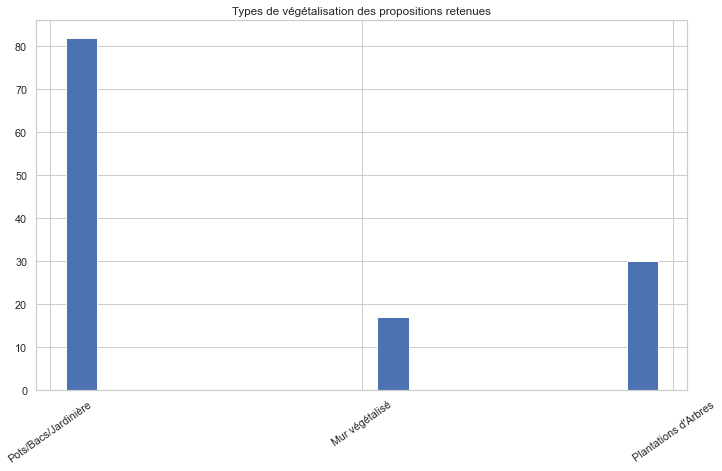

In [62]:
#Type de végétalisation  retenus
fig, ax = plt.subplots(figsize=(12,7), dpi=70)
plt.xticks(rotation=35)
retenu['Type de végétalisation'].hist(ax=ax,alpha=1,rwidth=0.5)
plt.title("Types de végétalisation des propositions retenues");

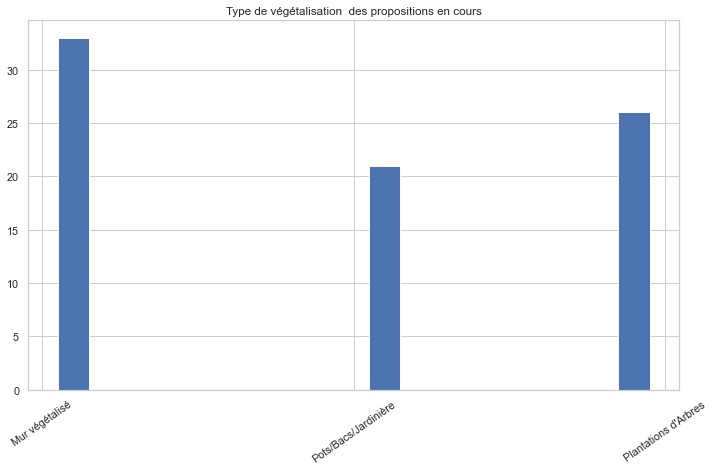

In [63]:
#Type de végétalisation  en cours
fig, ax = plt.subplots(figsize=(12,7), dpi=70)
plt.xticks(rotation=35)
encours['Type de végétalisation'].hist(ax=ax,alpha=1,rwidth=0.5)
plt.title("Type de végétalisation  des propositions en cours");

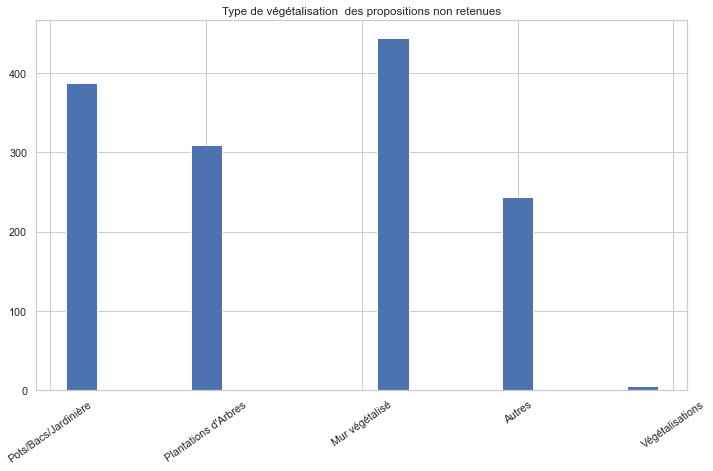

In [64]:
#Type de végétalisation  non retenues
fig, ax = plt.subplots(figsize=(12,7), dpi=70)
plt.xticks(rotation=35)
nonretenu['Type de végétalisation'].hist(ax=ax,alpha=1,rwidth=0.5)
plt.title("Type de végétalisation  des propositions non retenues");

### Stats des causes de refus des propositions

In [65]:
#Les causes du refus des propositions avec ordre décroissant
nonretenu['Proposition non réalisable'].value_counts(ascending=False).to_frame()

,Proposition non réalisable
-,299
la proposition n'a pas été retenue car le trottoir est trop étroit,162
"la proposition n'a pas été retenue car elle correspond à un opération de plus grande ampleur, incluant potentiellement des travaux relativement conséquents, allant au-delà de cet appel à propositions qui vise à développer une végétalisation de",142
la proposition n'a pas été retenue car l'espace n'est pas suffisant,113
"l'absence de commentaires ou de photos, ou de précisions suffisantes, n'ont pas permis aux services de caractériser le type de végétalisation souhaité ou un emplacement suffisament précis",85
la proposition n'a pas été retenue car elle concerne une zone située en dehors du domaine public géré par la Ville de Paris,80
la proposition n'a pas été retenue car elle concerne une zone non accessible depuis l'espace public,63
la proposition n'a pas été retenue car aucun mur susceptible de servir de support à de la végétation n'a été trouvé à l'adresse indiquée,54
"la proposition n'a pas été retenue car elle faisait état d'un dysfonctionnement de l'espace public, et ne rentrait pas dans le cadre de l'opération Du Vert Près de Chez Moi",44
la proposition ne rentre pas dans le cadre de l'opération Du Vert Près de Chez Moi car elle est sans rapport avec une végétalisation de proximité sur l'espace public,43


#### Harmonisation des causes de refus par mots clés

In [66]:
#Vérification des NaN/Lignes vides
nonretenu["Proposition non réalisable"].isna().sum()

2

In [67]:
#Inspection des lignes en question
pd.options.display.max_colwidth = 300
nonretenu[nonretenu['Proposition non réalisable'].isna()]['Commentaitre accompagnant la proposition'].to_frame()

,Commentaitre accompagnant la proposition
Arrondissement,
75011,"De la part des locataires : devant notre immeuble, un terre-plein est en permanence dégradé par des détritus, graffitis"
75019,Ce pont n'a pas été nettoyé lors de la réfection du quai. Il serait bon de le valoriser parce qu'il est très glauque


En lisant les commentaires, aucune classification claire ne peut être attribuée à ces 2 propositions

In [68]:
nonretenu['Proposition non réalisable']=nonretenu['Proposition non réalisable'].replace(np.nan, 'hors contexte', regex=True)

In [69]:
#Modalité "Domaine privé"
nonretenu.loc[nonretenu['Proposition non réalisable'].str.contains(r'(^.*public*.$)'), ['Proposition non réalisable']] = "Domaine privé"

In [70]:
#Modalité "Hors contexte"
nonretenu.loc[nonretenu['Proposition non réalisable'].str.contains(r'(^.*sans rapport*.$)|(^.*grande ampleur*.$)'), ['Proposition non réalisable']] = "Hors contexte"

In [71]:
#Modalité "Réalisable mais non retenue"
nonretenu.loc[nonretenu['Proposition non réalisable']=='-']['Etat de la proposition'].value_counts()


proposition réalisable techniquement mais non retenue dans les 200 points de végétalisation    299
Name: Etat de la proposition, dtype: int64

In [72]:
nonretenu.loc[nonretenu['Proposition non réalisable'].str.contains("-"), ['Proposition non réalisable']] = "Réalisable mais non retenue"

In [73]:
#Modalité "Espace inadéquat"
nonretenu.loc[~nonretenu['Proposition non réalisable'].str.contains(r'(Domaine privé)|(hors contexte)|(Réalisable mais non retenue)'), ['Proposition non réalisable']] = "Espace inadéquat"

In [74]:
nonretenu['Proposition non réalisable'].value_counts().to_frame()

,Proposition non réalisable
Espace inadéquat,821
Réalisable mais non retenue,441
Domaine privé,126
hors contexte,2


In [75]:
#Stats des causes de refus par arrondissement
nonretenu['Proposition non réalisable'].groupby(nonretenu.index).value_counts(normalize=True).mul(100).round(decimals=0).to_frame()

Proposition non réalisable
Arrondissement Proposition non réalisable                             
75001          Espace inadéquat                                   84.0
               Réalisable mais non retenue                        16.0
75002          Espace inadéquat                                   54.0
               Réalisable mais non retenue                        41.0
               Domaine privé                                       5.0
75003          Espace inadéquat                                   82.0
               Réalisable mais non retenue                        13.0
               Domaine privé                                       4.0
75004          Espace inadéquat                                   58.0
               Réalisable mais non retenue                        42.0
75005          Espace inadéquat                                   78.0
               Réalisable mais non retenue                        22.0
75006          Espace inadéquat                                   82.0
               Réalisable mais non retenue                        18.0
75007          Espace inadéquat                                   54.0
               Domaine privé                                      23.0
               Réalisable mais non retenue                        23.0
75008          Espace inadéquat                                   83.0
               Réalisable mais non retenue                        14.0
               Domaine privé                                       3.0
75009          Espace inadéquat                                   62.0
               Réalisable mais non retenue                        28.0
               Domaine privé                                      10.0
75010          Espace inadéquat                                   58.0
               Réalisable mais non retenue                        36.0
               Domaine privé                                       6.0
75011          Espace inadéquat                                   67.0
               Réalisable mais non retenue                        30.0
               Domaine privé                                       2.0
               hors contexte                                       1.0
75012          Espace inadéquat                                   54.0
               Réalisable mais non retenue                        32.0
               Domaine privé                                      14.0
75013          Espace inadéquat                                   58.0
               Réalisable mais non retenue                        33.0
               Domaine privé                                       8.0
75014          Espace inadéquat                                   49.0
               Réalisable mais non retenue                        38.0
               Domaine privé                                      13.0
75015          Espace inadéquat                                   55.0
               Réalisable mais non retenue                        33.0
               Domaine privé                                      12.0
75016          Espace inadéquat                                   67.0
               Domaine privé                                      24.0
               Réalisable mais non retenue                        10.0
75017          Espace inadéquat                                   63.0
               Réalisable mais non retenue                        27.0
               Domaine privé                                      10.0
75018          Espace inadéquat                                   58.0
               Réalisable mais non retenue                        30.0
               Domaine privé                                      12.0
75019          Espace inadéquat                                   52.0
               Réalisable mais non retenue                        36.0
               Domaine privé                                      12.0
               hors contexte                                       1

## **<span style="color:#37a871">Stats des causes de refus par Arrondissement</span>**

In [76]:
frame = nonretenu['Proposition non réalisable'].groupby(nonretenu.index).value_counts().to_frame().copy(deep=True)
frame.columns = ['Times']
frame.reset_index(inplace=True)
frame = frame.pivot(index='Arrondissement', columns='Proposition non réalisable',values='Times').fillna(0)
frame.reset_index(inplace=True)
frame['Dom. Pr + Esp Inad'] = frame['Domaine privé'] + frame['Espace inadéquat']
frame['Dom. Pr + Esp Inad + Réal Non Ret'] = frame['Dom. Pr + Esp Inad'] + frame['Réalisable mais non retenue']
frame['Total'] = frame['Dom. Pr + Esp Inad + Réal Non Ret'] + frame['hors contexte']

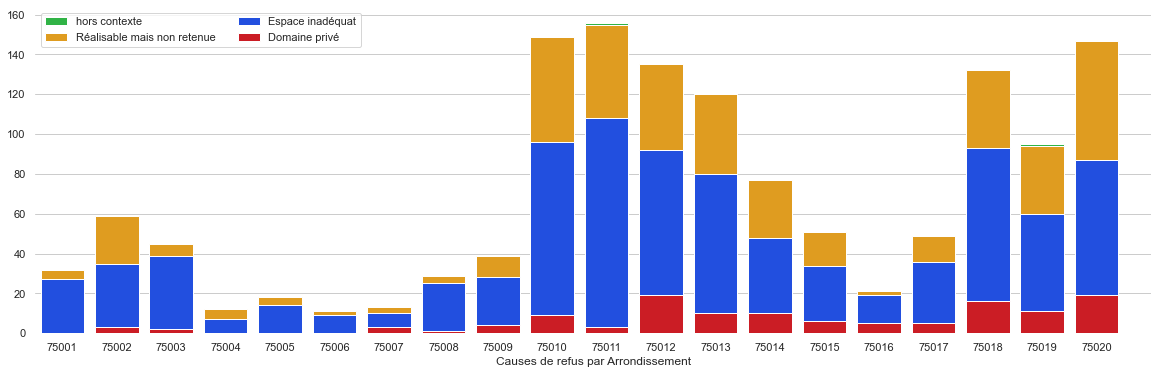

In [77]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 6))

sns.set_color_codes("bright")
sns.barplot(x="Arrondissement", y="Total", data=frame,
            label="hors contexte", color="g")


sns.set_color_codes("bright")
sns.barplot(x="Arrondissement", y="Dom. Pr + Esp Inad + Réal Non Ret", data=frame,
            label="Réalisable mais non retenue", color="orange")


sns.set_color_codes("bright")
sns.barplot(x="Arrondissement", y="Dom. Pr + Esp Inad", data=frame,
            label="Espace inadéquat", color='b')

sns.set_color_codes("bright")
sns.barplot(x="Arrondissement", y="Domaine privé", data=frame,
            label="Domaine privé", color='r')


ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlim=(-0.5, 20), ylabel="",
       xlabel="Causes de refus par Arrondissement")
sns.despine(left=True, bottom=True)

## <h1><center><span style="color:RED"> Model prediction </span> </center></h1>

In [78]:
retenu.set_index(['Arrondissement'], inplace=True)

In [79]:
df = pd.concat([retenu, encours, nonretenu], axis=0)

In [80]:
#Réduction des types de modalités dans la colonne Target
df.loc[df['Avancement du projet'].str.contains('en cours'), ['Avancement du projet']] = "retenu"

[![11.png](https://i.postimg.cc/DZ28mpZ6/11.png)](https://postimg.cc/sBNVNc5G)

En comparant la corrélation V de Cramer dans les 2 DF:

La variable `[Type de végétalisation]` présentant une corrélation < 0.4 avec les autres variables, on a donc supprimé cette dernière


DF initiale: 

   `[Proposition non réalisable]`  & `[Etat de la proposition]` : 0.7-0.8
   
   `[Avancement du projet]` & `[Etat de la proposition]` : 0.7-0.8

DF modifié: 

   `[Proposition non réalisable]`  & `[Etat de la proposition]` : 0.9
   
   `[Avancement du projet]` & `[Etat de la proposition]` : 0.9
  
 

In [81]:
df.drop(columns=['Geo Point','Type de végétalisation'], axis=1, inplace=True)

### Split de la base de données

In [82]:
print(f"La base fait {df.shape[0]} lignes et {df.shape[1]} colonnes")

La base fait 1599 lignes et 4 colonnes


In [83]:
df.columns

Index(['Proposition non réalisable', 'Etat de la proposition',
       'Commentaitre accompagnant la proposition', 'Avancement du projet'],
      dtype='object')

In [84]:
#X étant la dataframe des variables d'entrainement & Y la dataframe de la variable target

X_train = df[['Proposition non réalisable','Etat de la proposition','Commentaitre accompagnant la proposition']]
Y_train = df[['Avancement du projet']]

## Le split Train/Validation/Test :

- train = 53% df 
- validation = 22% df 
- test = 25% df

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [86]:
print(f"Les bases X_train & Y_train font {X_train.shape[0]} & {Y_train.shape[0]} lignes et {X_train.shape[1]} & {Y_train.shape[1]} colonnes")

print(f"Les bases X_val & Y_val font {X_val.shape[0]} & {Y_val.shape[0]} lignes et {X_val.shape[1]} & {Y_val.shape[1]} colonnes")

print(f"Les bases X_test & Y_test font {X_test.shape[0]} & {Y_test.shape[0]} lignes et {X_test.shape[1]} & {Y_test.shape[1]} colonnes")

Les bases X_train & Y_train font 839 & 839 lignes et 3 & 1 colonnes
Les bases X_val & Y_val font 360 & 360 lignes et 3 & 1 colonnes
Les bases X_test & Y_test font 400 & 400 lignes et 3 & 1 colonnes


## Encoding des données

In [87]:
label_encoder = preprocessing.LabelEncoder()

In [88]:
X_train_encod=X_train.apply(label_encoder.fit_transform)
Y_train_encod=Y_train.apply(label_encoder.fit_transform)
X_val_encod=X_val.apply(label_encoder.fit_transform)
Y_val_encod=Y_val.apply(label_encoder.fit_transform)
X_test_encod=X_test.apply(label_encoder.fit_transform)
Y_test_encod=Y_test.apply(label_encoder.fit_transform)

Le `Label encoding` assigne par défaut 0 /1 suivant l'ordre alphabétique

`0` = `non retenu`

`1` = `retenu`

### Train

In [89]:
#Entrainement du modele 
logreg= LogisticRegression()
LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train_encod,Y_train_encod.values.ravel()) #Y_train_encod = nparray

LogisticRegression()

### Validation

In [90]:
#Validation
Y_pred_val=logreg.predict(X_val_encod)

In [91]:
class_report_v = classification_report(Y_val_encod, Y_pred_val, output_dict=True,target_names=['Non retenu', 'Retenu'],zero_division=1)
pd.DataFrame(class_report_v)

,Non retenu,Retenu,accuracy,macro avg,weighted avg
precision,1.000000,0.978261,0.997222,0.989130,0.997283
recall,0.996825,1.000000,0.997222,0.998413,0.997222
f1-score,0.998410,0.989011,0.997222,0.993711,0.997235
support,315.000000,45.000000,0.997222,360.000000,360.000000


### Test

In [92]:
Y_pred_test=logreg.predict(X_test_encod)

In [93]:
#Rapport de prédiction du X_test
class_report_t = classification_report(Y_test_encod, Y_pred_test,output_dict=True,target_names=['Non retenu', 'Retenu'], zero_division = 1)
pd.DataFrame(class_report_t)

,Non retenu,Retenu,accuracy,macro avg,weighted avg
precision,1.000000,0.960000,0.995,0.980000,0.995200
recall,0.994318,1.000000,0.995,0.997159,0.995000
f1-score,0.997151,0.979592,0.995,0.988371,0.995044
support,352.000000,48.000000,0.995,400.000000,400.000000


`recall` : Nombre de classes trouvées par rapport aux nombres entiers de cette même classe.

`precision` : Combien de classes ont été correctements classifiées

`f1-score` : La moyenne harmonique entre precision & recall

`support` : Le nombre d'occurences de la classe donnée dans le dataframe 

In [94]:
warnings.filterwarnings("ignore", 'FixedFormatter' )

La matrice de confusion : 
[[350   2]
 [  0  48]]


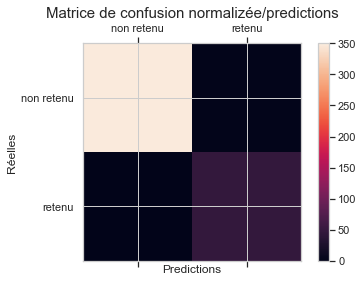

In [95]:
#Matrice de confusion normalizée par rapports aux prédictions
cm = confusion_matrix(Y_test_encod, Y_pred_test)
print("La matrice de confusion : \n{}".format(cm))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
labels = ['non retenu', 'retenu']
plt.title('Matrice de confusion normalizée/predictions', loc='center', fontsize=15)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predictions')
plt.ylabel('Réelles')
plt.show()